# **Data Corralation**

## Objectives

+ Answer business requirement 1:
    + The client is interested in discovering how the house attributes correlate with the sale price.

## Inputs
+ /workspace/Project_05/outputs/datasets/cleaned/HousePricesCleaned.csv


## Outputs
+ Conclusion of which datas that are corralate the most and the least with sale price.


---

# Change working directory

In [15]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/Project_05'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [16]:

os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


In [17]:
current_dir = os.getcwd()
current_dir

'/workspace'

# Load data

In [18]:
import pandas as pd
df = pd.read_csv(f"/workspace/Project_05/outputs/datasets/cleaned/HousePricesCleaned.csv")
df.head()

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtFinSF1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageYrBlt,GrLivArea,LotArea,...,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Unf,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA
0,856,854.000000,3.000000,706,150,0.000000,548,2003.0,1710,8450,...,0,1,0,0,0,1,0,0,1,0
1,1262,0.000000,3.000000,978,284,25.330882,460,1976.0,1262,9600,...,1,0,0,0,0,1,0,0,0,1
2,920,866.000000,3.000000,486,434,0.000000,608,2001.0,1786,11250,...,0,1,0,0,0,1,0,0,1,0
3,961,348.524017,2.869214,216,540,25.330882,642,1998.0,1717,9550,...,1,0,0,0,0,0,1,0,1,0
4,1145,348.524017,4.000000,655,490,0.000000,836,2000.0,2198,14260,...,0,1,0,0,0,1,0,0,1,0


# Data Exploration

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

<AxesSubplot:ylabel='Frequency'>

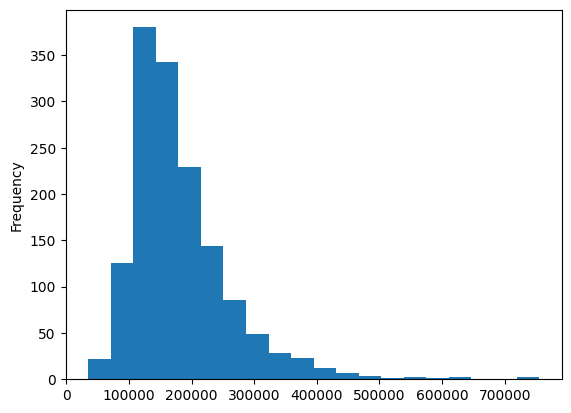

In [20]:
df.SalePrice.plot.hist(bins=20)

**Observation**

+ Normal distribution with outlier on the rightside
+ Will bin to allow for inspection of non-linear relationship

In [21]:
def binner(x):
  if x < 150000:
    return "low"
  elif x > 300000:
    return "high"
  else:
    return "medium"

In [22]:
df["SalePrice_bin"] = df["SalePrice"].apply(binner)

+ Using binner to able to catogorised the data, those are Low, high, and medium

<AxesSubplot:>

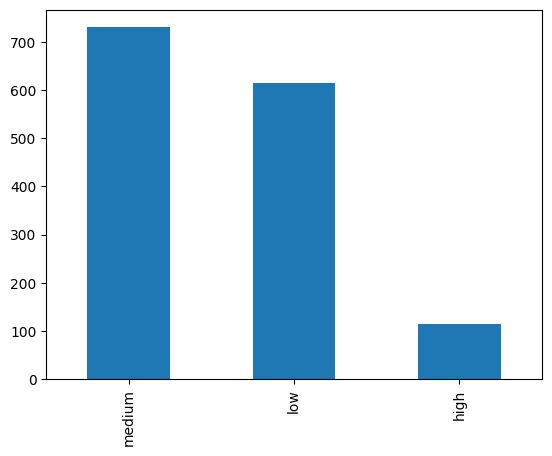

In [23]:
df.SalePrice_bin.value_counts().plot.bar()

In [24]:
df.SalePrice_bin.value_counts(normalize = True)

medium    0.500000
low       0.421233
high      0.078767
Name: SalePrice_bin, dtype: float64

**Observation**

+ Bucketize feature 50% in medium, 42% in Low, and 7,8% in High

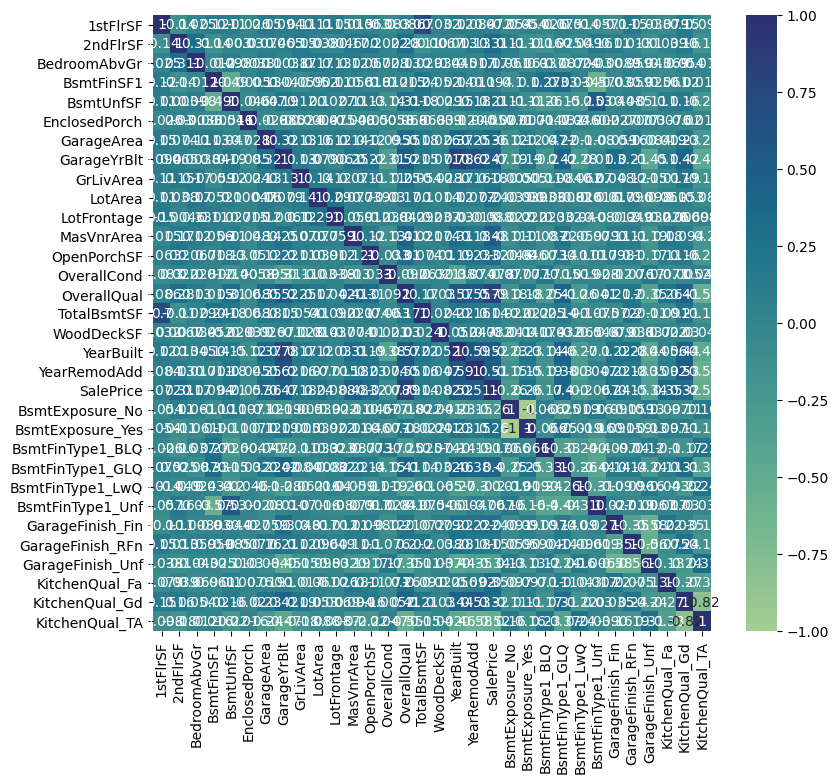

In [25]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(9, 8))
sns.heatmap(corr_matrix, annot=True, cmap="crest")
plt.show()

+ This is the correlation matrix, as can be seen there are too many variable to view the correlation clearly.
+ So, we will focus the correlation with our target

## Correlations with SalePrice

<AxesSubplot:title={'center':'Correlation with SalePrice'}>

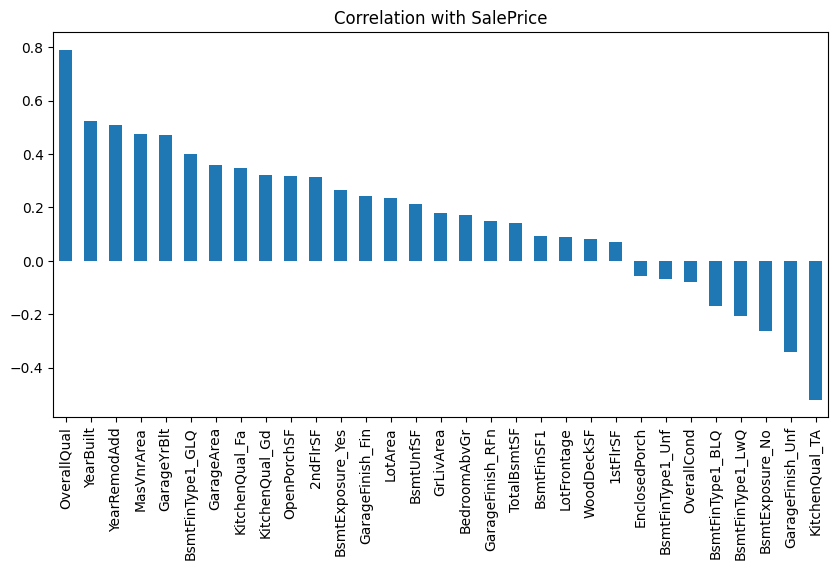

In [26]:
df.corrwith(df.SalePrice).sort_values(ascending = False)[1:].plot.bar(title="Correlation with SalePrice", figsize = (10,5))

# Conclusion

+ OverallQual, YearBuilt, and YearRemodADD are the highest positive correlation with SalePrice
+ The category BsmtExposure_No, GarageFinish_Unf, and KitchenQual_TA are the highest negeative correlation with SalePrice
+ 1stFlrSF and EnclosedPorch has the lowest correlation with SalePrice